In [2]:
from IPython.core.display import display, HTML
display(HTML("""<style>
.container { width:99% !important; }
div.text_cell_render { /* Customize text cells */
    font-size:1.5em;
    line-height:1.4em;
    padding-left:3em;
    padding-right:3em;
}
</style>"""))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Baseline Dataset Plot

In [4]:
lag = 512 # [32, 64, 128, 256, 512] 

base = pd.read_pickle('./pkl_datasets/baseline_dataset_ACF_' + str(lag) + '.gzip')
cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')

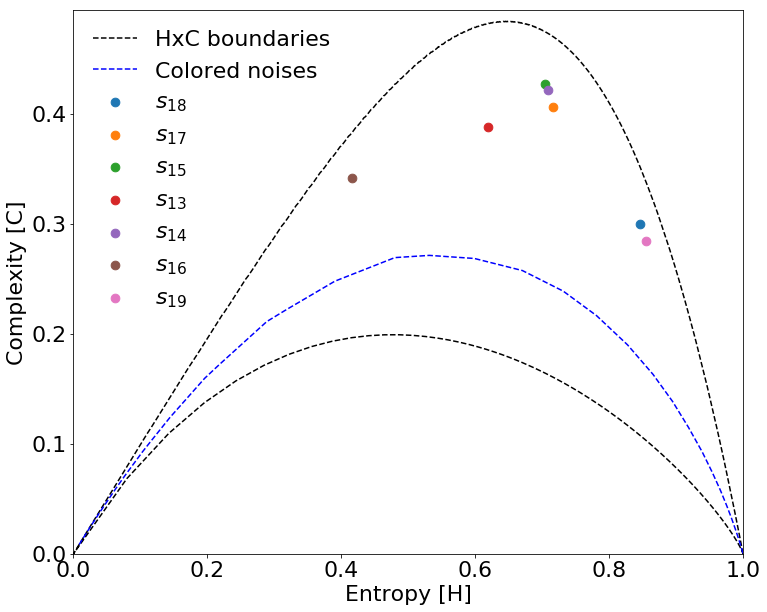

In [5]:
plt.figure(figsize=(12,10))
plt.rc('font', size=22)
plt.rc('axes', titlesize=22)

for index, row in base.iterrows():
    lab = '$s_{'+(row['ID'].split('.'))[-2].split('0')[-1]+'}$'
    plt.scatter(row['H'], row['C'], marker='.', s=300, label = lab)


plt.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = 'HxC boundaries')
plt.plot(noise['Entropy'],noise['Complexity'], '--b', label = 'Colored noises')
plt.xlim([0, 1])
plt.ylim([0, np.max(cotas['Complexity'])+0.01])
plt.ylabel('Complexity [C]')
plt.xlabel('Entropy [H]')
plt.legend(loc = 'upper left', frameon=False)
plt.savefig('./figures/Fig3.eps', format="eps", bbox_inches='tight')
plt.show()